# Import the Dataset

In [14]:
import pandas as pd 
# Load Heart Disease UCI Dataset
# Source https://www.kaggle.com/datasets/navjotkaushal/heart-disease-uci-dataset
heart = pd.read_csv("Data/cleanned.csv") 

# Inspect the Data

First rows

In [15]:
print("Heart Data:") 
print(heart.head())

Heart Data:
   age     sex              cp  trestbps   chol    fbs         restecg  \
0   63    Male  typical angina     145.0  233.0   True  lv hypertrophy   
1   67    Male    asymptomatic     160.0  286.0  False  lv hypertrophy   
2   67    Male    asymptomatic     120.0  229.0  False  lv hypertrophy   
3   37    Male     non-anginal     130.0  250.0  False          normal   
4   41  Female  typical angina     130.0  204.0  False  lv hypertrophy   

   thalch  exang  oldpeak  num  
0   150.0  False      2.3    0  
1   108.0   True      1.5    2  
2   129.0   True      2.6    1  
3   187.0  False      3.5    0  
4   172.0  False      1.4    0  


Data types and summary statistics

In [16]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       918 non-null    int64  
 1   sex       918 non-null    object 
 2   cp        918 non-null    object 
 3   trestbps  918 non-null    float64
 4   chol      918 non-null    float64
 5   fbs       918 non-null    bool   
 6   restecg   918 non-null    object 
 7   thalch    918 non-null    float64
 8   exang     918 non-null    bool   
 9   oldpeak   918 non-null    float64
 10  num       918 non-null    int64  
dtypes: bool(2), float64(4), int64(2), object(3)
memory usage: 66.5+ KB


In [17]:
#Numeric Variables
heart.describe()


,age,trestbps,chol,thalch,oldpeak,num
count,918.000000,918.000000,918.000000,918.000000,918.00000,918.000000
mean,53.510893,132.141612,199.862745,137.689542,0.85512,0.995643
std,9.432617,17.924706,109.154522,25.153455,1.05845,1.142985
min,28.000000,80.000000,0.000000,60.000000,-2.60000,0.000000
25%,47.000000,120.000000,177.250000,120.000000,0.00000,0.000000
50%,54.000000,130.000000,223.000000,140.000000,0.50000,1.000000
75%,60.000000,140.000000,267.000000,155.750000,1.50000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.20000,4.000000


In [52]:
cat_cols = ["sex", "cp", "restecg", "fbs", "exang", "num"]

for col in cat_cols:
    if col in heart.columns:
        summary = pd.DataFrame({
            "Count": heart[col].value_counts(dropna=False),
            "Percentage": (heart[col].value_counts(normalize=True, dropna=False) * 100).round(2)
        })
        print(f"\nFrequencies for {col}:")
        display(summary)



Frequencies for sex:


,Count,Percentage
sex,,
Male,725,78.98
Female,193,21.02



Frequencies for cp:


,Count,Percentage
cp,,
asymptomatic,496,54.03
typical angina,219,23.86
non-anginal,203,22.11



Frequencies for restecg:


,Count,Percentage
restecg,,
normal,552,60.13
lv hypertrophy,188,20.48
st-t abnormality,178,19.39



Frequencies for fbs:


,Count,Percentage
fbs,,
False,780,84.97
True,138,15.03



Frequencies for exang:


,Count,Percentage
exang,,
False,582,63.4
True,336,36.6



Frequencies for num:


,Count,Percentage
num,,
0,410,44.66
1,265,28.87
2,108,11.76
3,107,11.66
4,28,3.05


Missing values and duplicates

In [19]:
# Check for missing values
print("Missing values:\n", heart.isnull().sum())

Missing values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
num         0
dtype: int64


In [20]:
#Show duplicates
heart[heart.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,num


There were no duplicates

# Basic Filtering and Grouping
Potential subsets


In [21]:
#Subsets that could be interesting to analize
old = heart[heart["age"] > 65]
males = heart[heart["sex"] == "male"]
females = heart[heart["sex"] == "female"]
asymptomatic = heart[heart["cp"] == "asymptomatic"]


Statistics by group

In [22]:
#by sex
heart.groupby("sex")[heart.select_dtypes(include="number").columns].agg(["mean", "median", "count"])



age                 trestbps                     chol         \
             mean median count        mean median count        mean median   
sex                                                                          
Female  52.492228   53.0   193  132.186528  130.0   193  240.906736  241.0   
Male    53.782069   55.0   725  132.129655  130.0   725  188.936552  222.0   

                  thalch                oldpeak                    num         \
       count        mean median count      mean median count      mean median   
sex                                                                             
Female   193  146.108808  150.0   193  0.670984    0.0   193  0.424870    0.0   
Male     725  135.448276  140.0   725  0.904138    0.5   725  1.147586    1.0   

              
       count  
sex           
Female   193  
Male     725

In [23]:
#by Chest pain type
heart.groupby("cp")[heart.select_dtypes(include="number").columns].agg(["mean", "median", "count"])

age                 trestbps                     chol  \
                     mean median count        mean median count        mean   
cp                                                                            
asymptomatic    54.959677   56.0   496  132.846774  130.0   496  188.106855   
non-anginal     53.310345   53.0   203  131.093596  130.0   203  198.463054   
typical angina  50.415525   52.0   219  131.515982  130.0   219  227.785388   

                                 thalch                oldpeak               \
               median count        mean median count      mean median count   
cp                                                                            
asymptomatic    223.0   496  129.495968  130.0   496  1.121774    1.0   496   
non-anginal     220.0   203  144.413793  146.0   203  0.630049    0.2   203   
typical angina  233.0   219  150.013699  150.0   219  0.459817    0.0   219   

                     num               
                    mean median count  
cp                                     
asymptomatic    1.443548    1.0   496  
non-anginal     0.655172    0.0   203  
typical angina  0.296804    0.0   219

In [24]:
#by Target variable (Heart disease diagnosis)
heart.groupby("num")[heart.select_dtypes(include="number").columns].agg(["mean", "median", "count"])

age                 trestbps                     chol               \
          mean median count        mean median count        mean median count   
num                                                                             
0    50.551220   51.0   410  129.965854  130.0   410  227.690244  225.5   410   
1    53.528302   55.0   265  132.720755  130.0   265  195.988679  226.0   265   
2    57.574074   58.5   108  133.194444  130.0   108  144.629630  193.0   108   
3    59.214953   60.0   107  136.504673  130.0   107  160.308411  214.0   107   
4    59.214286   59.0    28  137.785714  132.0    28  193.250000  224.0    28   

         thalch                oldpeak               num               
           mean median count      mean median count mean median count  
num                                                                    
0    148.343902  150.0   410  0.423415   0.00   410  0.0    0.0   410  
1    131.475472  130.0   265  0.972830   1.00   265  1.0    1.0   265  
2    129.500000  131.0   108  1.302778   1.40   108  2.0    2.0   108  
3    122.869159  122.0   107  1.419626   1.00   107  3.0    3.0   107  
4    128.714286  126.5    28  2.178571   2.45    28  4.0    4.0    28

# Explore a Machine Learning Algorithm
For simplicity, the variable num will be recategorized into 0 and 1, with 0 representing no disease and 1 indicating the presence of heart disease. 

In [ ]:
#Model 1: Only Sex and age
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
heart["disease"] = (heart["num"] > 0).astype(int)
heart_d = pd.get_dummies(
    heart,
    columns=["sex", "cp", "restecg", "fbs", "exang"],
    drop_first=True
)
heart_d
subset_variables= ["age", "sex_Male"]
X = heart_d[subset_variables]
y = heart_d["disease"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2000, stratify=y
)

model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
sensitivity = recall_score(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()
specificity = TN / (TN + FP)
print("Variables included:", list(X.columns))
print("Accuracy:", round(acc, 3))
print("Sensitivity: ", round(sensitivity, 3))
print("Specificity: ", round(specificity, 3))

Variables included: ['age', 'sex_Male']
Accuracy: 0.696
Sensitivity:  0.824
Specificity:  0.537


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
heart["disease"] = (heart["num"] > 0).astype(int)
heart_d = pd.get_dummies(
    heart,
    columns=["sex", "cp", "restecg", "fbs", "exang"],
    drop_first=True
)

X = heart_d.drop(columns=["num", "disease"])
y = heart_d["disease"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2000, stratify=y
)

model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
sensitivity = recall_score(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()
specificity = TN / (TN + FP)
print("Variables included:", list(X.columns))
print("Accuracy:", round(acc, 3))
print("Sensitivity: ", round(sensitivity, 3))
print("Specificity: ", round(specificity, 3))

Variables included: ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'sex_Male', 'cp_non-anginal', 'cp_typical angina', 'restecg_normal', 'restecg_st-t abnormality', 'fbs_True', 'exang_True']
Accuracy: 0.815
Sensitivity:  0.824
Specificity:  0.805


The second model, which incorporates more variables, shows improved accuracy, sensitivity, and specificity. Further refinement could involve applying more advanced methods for variable selection or exploring alternative ML algorithms.

# Visualization

Below are two examples of visualization. The first shows the distribution of age by sex. The second shows age by severity.

<Figure size 600x600 with 0 Axes>

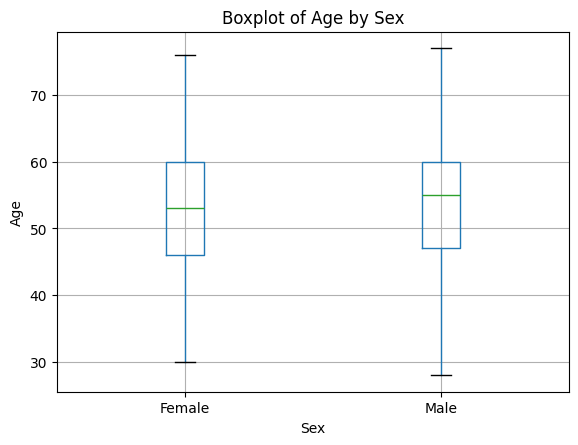

In [49]:
import matplotlib.pyplot as plt

# Boxplot de edad por sexo
plt.figure(figsize=(6,6))
heart.boxplot(column="age", by="sex")
plt.title("Boxplot of Age by Sex")
plt.suptitle("") 
plt.xlabel("Sex")
plt.ylabel("Age")
plt.show()

<Figure size 600x600 with 0 Axes>

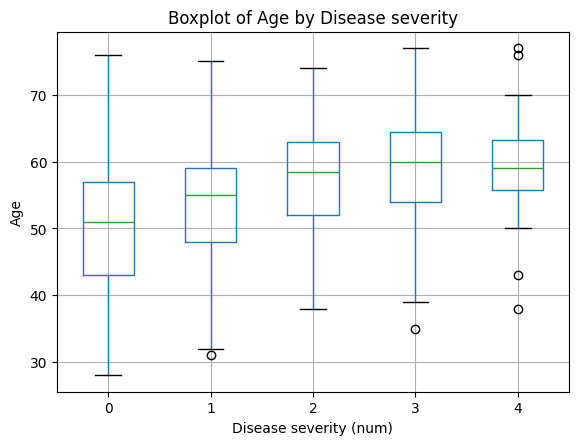

In [50]:
import matplotlib.pyplot as plt

# Boxplot sex-severity
plt.figure(figsize=(6,6))
heart.boxplot(column="age", by="num")
plt.title("Boxplot of Age by Disease severity")
plt.suptitle("") 
plt.xlabel("Disease severity (num)")
plt.ylabel("Age")
plt.show()